In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 概要
- 前処理
- 因子分析(バリマックス回転)(性別学年のぞく)
- ロジスティック(性別プラス学年プラス質問)
- 交差検証(性別プラス学年プラス質問)

# 前処理

In [31]:
df = pd.read_csv('../data/0617_result_question.csv')
#列名クラスと人を消したい

#点数が高いほど、遅延したくなる
df["2-1"] = df["2-1"].map(lambda x:5-x)
df["2-3"] = df["2-3"].map(lambda x:5-x)
df["2-7"] = df["2-7"].map(lambda x:5-x)
df["3-4.国"] = df["3-4.国"].map(lambda x:5-x)
df["3-5.国"] = df["3-5.国"].map(lambda x:5-x)
df["3-4.英"] = df["3-4.英"].map(lambda x:5-x)
df["3-5.英"] = df["3-5.英"].map(lambda x:5-x)
df["3-4.数"] = df["3-4.数"].map(lambda x:5-x)
df["3-5.数"] = df["3-5.数"].map(lambda x:5-x)

df = df.drop(['クラス', '人'], axis=1)
df_math = df[[ '学年', '性別', '2-1', '2-2', '2-3', '2-4', '2-5', '2-6', '2-7', '3-1.数学', '3-2.数',
       '3-3.数', '3-4.数', '3-5.数']]

df_english = df[['学年', '性別', '2-1', '2-2', '2-3', '2-4', '2-5', '2-6', '2-7', '3-1.英語',  '3-2.英',  '3-3.英', '3-4.英', '3-5.英']]
df_japanese = df[['学年', '性別', '2-1', '2-2', '2-3', '2-4', '2-5', '2-6', '2-7', '3-1.国',  '3-2.国',  '3-3.国', '3-4.国', '3-5.国']]

#MBTI列以外で欠損ちがある行を削除
df_math = df_math.dropna(subset=['学年', '性別', '2-1', '2-2', '2-3', '2-4', '2-5', '2-6', '2-7', '3-1.数学', '3-2.数','3-3.数', '3-4.数', '3-5.数'])
#MBTI列以外で欠損ちがある行を削除
df_english = df_english.dropna(subset=['学年', '性別', '2-1', '2-2', '2-3', '2-4', '2-5', '2-6', '2-7', '3-1.英語',  '3-2.英',  '3-3.英', '3-4.英', '3-5.英'])
#MBTI列以外で欠損ちがある行を削除
df_japanese = df_japanese.dropna(subset=['学年', '性別', '2-1', '2-2', '2-3', '2-4', '2-5', '2-6', '2-7', '3-1.国',  '3-2.国',  '3-3.国', '3-4.国', '3-5.国'])

#数学のデータフレームを作成
df_math["Y_math"] = df_math["3-1.数学"].map(lambda x: 1 if x == "土" or x == "未"  else 0)
df_math = df_math.drop("3-1.数学", axis=1)
df_math = df_math.astype(int)
df_math = df_math.reset_index(drop=True)

#英語のデータフレームを作成
df_english["Y_english"] = df_english["3-1.英語"].map(lambda x: 1 if x == "土" or x == "未"  else 0)
df_english = df_english.drop("3-1.英語", axis=1)
df_english = df_english.astype(int)
df_english = df_english.reset_index(drop=True)

#国語のデータフレームを作成
df_japanese["Y_japanese"] = df_japanese["3-1.国"].map(lambda x: 1 if x == "土" or x == "未"  else 0)
df_japanese = df_japanese.drop("3-1.国", axis=1)
df_japanese = df_japanese.astype(int)
df_japanese = df_japanese.reset_index(drop=True)

# 因子分析(バリマックス回転)

In [32]:
def innsi(df):
    # データを標準化
    df2 = df.iloc[:, 2:-1]
    sc = StandardScaler()
    df_math_std = sc.fit_transform(df2)

    # 因子分析のインスタンスを生成と適用
    fa = FactorAnalyzer(n_factors=3, rotation='varimax')
    fa.fit(df_math_std)

    # 因子負荷量を出力
    loadings = pd.DataFrame(fa.loadings_, columns=['第1因子', '第2因子', '第3因子'], index=df2.columns)
    print(loadings)

    # 因子得点を算出
    factor_score = fa.transform(df_math_std)

    # 因子得点をデータフレームに変換
    factor_score_df = pd.DataFrame(factor_score, columns=['第1因子', '第2因子', '第3因子'])

    # 元のデータフレームと結合
    df_math = pd.concat([df, factor_score_df], axis=1)
    return df_math

In [33]:
df_math_innsi = innsi(df_math)
df_english_innsi = innsi(df_english)
df_japanese_innsi = innsi(df_japanese)

           第1因子      第2因子      第3因子
2-1    0.791391  0.160633 -0.280977
2-2    0.259016  0.521390  0.424957
2-3    0.027926  0.052685 -0.419403
2-4   -0.286728 -0.329387  0.130410
2-5   -0.121059  0.669906  0.124630
2-6   -0.052875  0.628683 -0.256848
2-7    0.289049  0.434724  0.122227
3-2.数  0.431028 -0.191028  0.466691
3-3.数  0.787059 -0.210147  0.009565
3-4.数 -0.218370  0.440308  0.752598
3-5.数  0.658987  0.216092  0.144086
           第1因子      第2因子      第3因子
2-1    0.021410  0.058210  0.848270
2-2    0.654327 -0.095021  0.342169
2-3   -0.180947  0.131029  0.010419
2-4   -0.038282 -0.616332 -0.354908
2-5    0.627391  0.256453 -0.131553
2-6    0.380457  0.565833 -0.022220
2-7    0.432529  0.074657  0.288993
3-2.英 -0.038992  0.597923 -0.141075
3-3.英 -0.025833  0.319733  0.202359
3-4.英  0.606897 -0.526395 -0.005491
3-5.英  0.568842  0.054574 -0.035326
           第1因子      第2因子      第3因子
2-1    0.250685  0.244013  0.091722
2-2    0.651301  0.019749  0.036603
2-3   -0.134879  0.064241 -0

# ロジスティック回帰

In [48]:
def lr(df,df_innsi):
    
    lr = LogisticRegression(random_state=0)

    # ロジスティック回帰を実行
    #テストデータと分割
    
    X = df_innsi[["学年","性別",'第1因子', '第2因子', '第3因子']]
    y = df.iloc[:,-1:]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    lr.fit(X_train, y_train)

    # テストデータを予測
    y_pred = lr.predict(X_test)
    print(y_pred)

    # テストデータに対する正答率を出力
    print('テストデータに対する正答率： %.3f' % accuracy_score(y_test, y_pred))

    #回帰係数を出力
    # lr.coef_を可視化
    coef_df = pd.DataFrame(lr.coef_, columns=["学年","性別",'第1因子', '第2因子', '第3因子'])
    
    plt.figure(figsize=(7, 2))
    sns.set(font='IPAexGothic')
    sns.barplot(data=coef_df, orient='h')
    plt.show()

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 0 0 1 1 1 0 1 1 1]
テストデータに対する正答率： 1.000


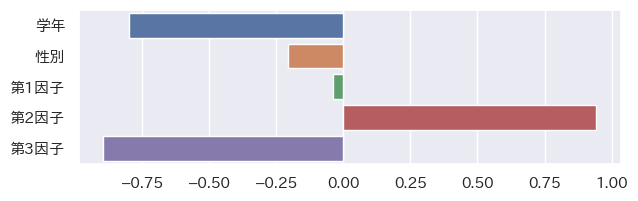

In [49]:
lr(df_math,df_math_innsi)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 1 1 1 1 1 1 0 1]
テストデータに対する正答率： 0.667


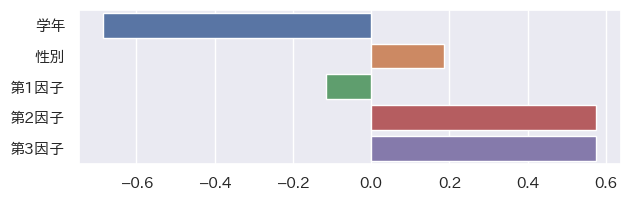

In [50]:
lr(df_english,df_english_innsi)

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1 0 1 1 1 1 1 1 1 1]
テストデータに対する正答率： 0.500


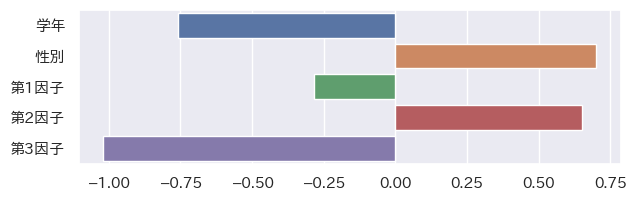

In [51]:
lr(df_japanese,df_japanese_innsi)

In [43]:
from sklearn.model_selection import cross_val_score

def lr_cross_val(df, df_innsi):
    
    lr = LogisticRegression(random_state=0)

    X = df_innsi[["学年","性別",'第1因子', '第2因子', '第3因子']]
    y = df.iloc[:,-1:].values.ravel()

    # ロジスティック回帰モデルの交差検証を実行
    scores = cross_val_score(lr, X, y, cv=5)

    # 各分割におけるスコア
    for i, score in enumerate(scores):
        print(f"分割{i+1}: 正答率 = {score:.3f}")

    # 平均スコア
    print(f"平均正答率: {scores.mean():.3f}")

    # モデルを全データで再学習
    lr.fit(X, y)

    #回帰係数を出力
    # lr.coef_を可視化
    coef_df = pd.DataFrame(lr.coef_, columns=["学年","性別",'第1因子', '第2因子', '第3因子'])
    
    plt.figure(figsize=(7, 2))
    sns.set(font='IPAexGothic')
    sns.barplot(data=coef_df, orient='h')
    plt.show()


分割1: 正答率 = 0.857
分割2: 正答率 = 1.000
分割3: 正答率 = 0.667
分割4: 正答率 = 0.667
分割5: 正答率 = 0.833
平均正答率: 0.805


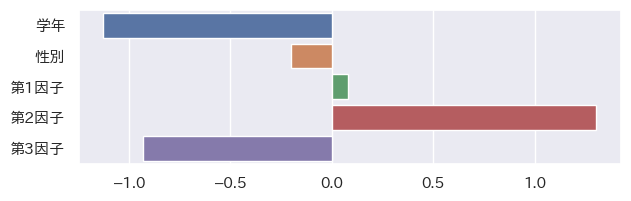

In [44]:
lr_cross_val(df_math,df_math_innsi)

分割1: 正答率 = 0.571
分割2: 正答率 = 0.714
分割3: 正答率 = 0.833
分割4: 正答率 = 0.667
分割5: 正答率 = 0.667
平均正答率: 0.690


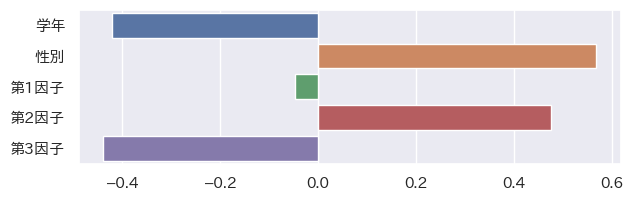

In [45]:
lr_cross_val(df_japanese,df_japanese_innsi)

分割1: 正答率 = 0.833
分割2: 正答率 = 0.667
分割3: 正答率 = 0.833
分割4: 正答率 = 0.833
分割5: 正答率 = 0.667
平均正答率: 0.767


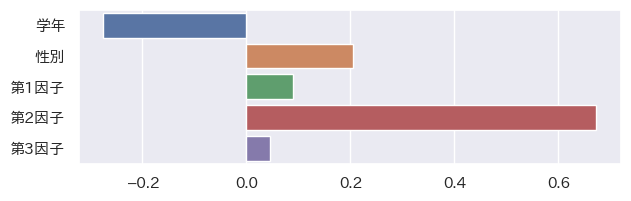

In [46]:
lr_cross_val(df_english,df_english_innsi)